In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [17]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [19]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.median()

distance_from_home                9.967760
distance_from_last_transaction    0.998650
ratio_to_median_purchase_price    0.997717
repeat_retailer                   1.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      1.000000
fraud                             0.000000
dtype: float64

<AxesSubplot:>

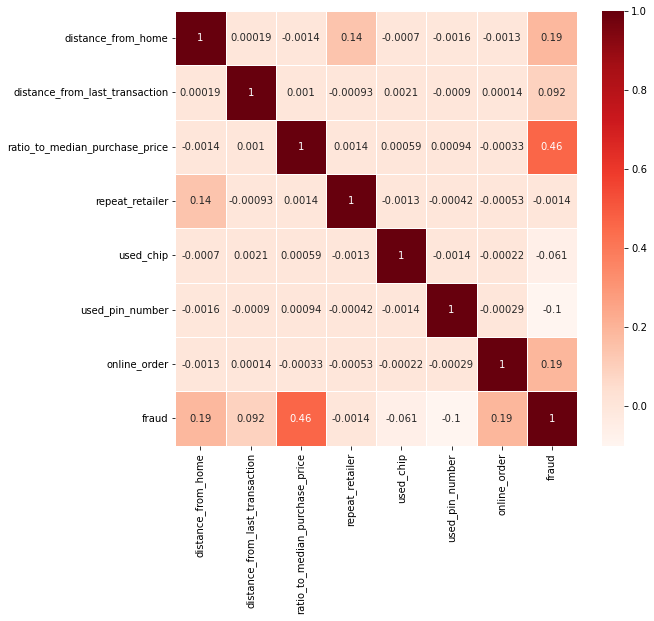

In [21]:
correlation_mat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'Reds',linewidths=0.5)

fraud
0.0    912597
1.0     87403
dtype: int64

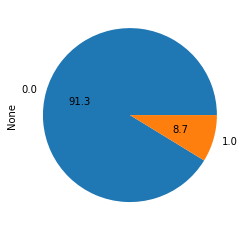

In [22]:
df.value_counts("fraud").plot.pie(autopct="%.1f")
df.value_counts("fraud")

In [23]:
r = df[df["fraud"] == 0]
f = df[df["fraud"] == 1]

In [24]:
r_sample = r.sample(n = 87403, random_state=42)
f_sample = f.sample(n = 87403, random_state=42)

In [25]:
df_n = pd.concat([r_sample, f_sample], axis = 'rows')
df_n.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
763547,8.073065,0.614990,0.077806,1.0,0.0,0.0,1.0,0.0
23634,31.994433,5.808574,1.186485,1.0,0.0,1.0,0.0,0.0
157152,8.015637,4.319242,0.906554,1.0,0.0,0.0,1.0,0.0
238071,6.230256,0.796154,0.206875,1.0,1.0,0.0,0.0,0.0
846711,44.997072,10.943190,0.856966,1.0,0.0,0.0,1.0,0.0


<AxesSubplot:ylabel='None'>

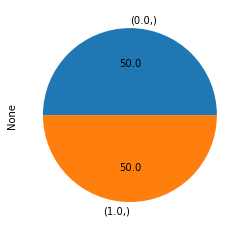

In [26]:
df_n.value_counts(["fraud"]).plot.pie(autopct = "%.1f")

In [70]:
X = df_n.drop(["fraud", "used_chip"], axis = 'columns')
y = df_n["fraud"]

In [71]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<font size = "5"><b>DECISION TREE</b> Model </font>


In [73]:
model_dt = DecisionTreeClassifier(random_state = 10)
model_dt.fit(X_train, y_train)
y_p = model_dt.predict(X_test)

In [74]:
model_dt.score(X_test, y_test)

0.9857273611349465

In [113]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [114]:
mdt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5, random_state = 10)
mdt.fit(X_train, y_train)
mdt.score(X_test, y_test)

0.9929637892569075

In [115]:
y_p = mdt.predict(X_test)

In [116]:
scores = cross_val_score(mdt, X_train, y_train, cv =10)
scores

array([0.99363604, 0.99213443, 0.99249196, 0.99320701, 0.99256293,
       0.99334954, 0.99406465, 0.99227689, 0.9923484 , 0.99392162])

In [117]:
cm = confusion_matrix(y_test, y_p)
cm

array([[17294,   246],
       [    0, 17422]], dtype=int64)

Text(69.0, 0.5, 'Truth')

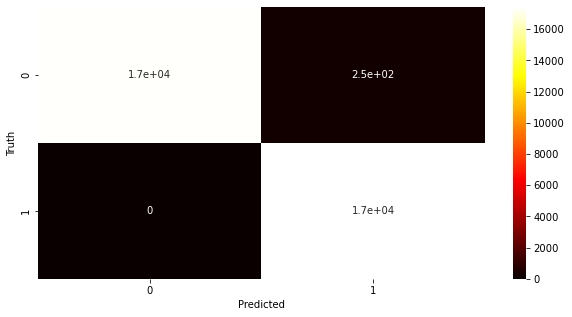

In [118]:
plt.figure(figsize = (10, 5))

sb.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [119]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17540
         1.0       0.99      1.00      0.99     17422

    accuracy                           0.99     34962
   macro avg       0.99      0.99      0.99     34962
weighted avg       0.99      0.99      0.99     34962



<font size = "5"> <b> RANDOM FOREST </b> Model </font>

In [120]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_prf = model_rf.predict(X_test)

In [121]:
model_rf.score(X_test, y_test)

0.992935186774212

In [122]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_s = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
grid_s.fit(X_train, y_train)
grid_s.best_params_

C:\Users\gevin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gevin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gevin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\gevin\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\gevin\anaconda3\lib\site-packages\jo

{'max_features': 2, 'n_estimators': 30}

In [123]:
mrf = RandomForestClassifier(max_features= 2, n_estimators= 30, random_state= 10)
mrf.fit(X_train, y_train)
mrf.score(X_test, y_test)

0.992763571878039

In [124]:
scores_rf = cross_val_score(mrf, X_train, y_train, cv = 10)
scores_rf

array([0.99349303, 0.99199142, 0.99249196, 0.993064  , 0.99270595,
       0.99327803, 0.99413616, 0.9923484 , 0.9923484 , 0.99385011])

In [125]:
cm_rf = confusion_matrix(y_test, y_prf)
cm_rf

array([[17294,   246],
       [    1, 17421]], dtype=int64)

Text(69.0, 0.5, 'Truth')

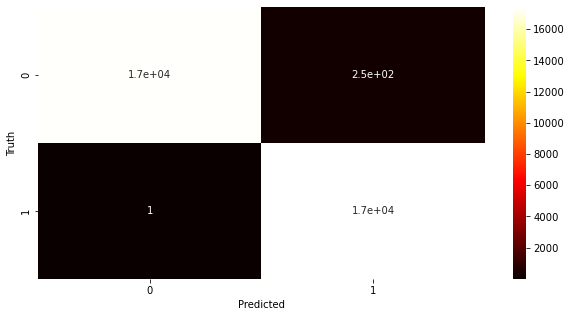

In [127]:
plt.figure(figsize = (10, 5))

sb.heatmap(cm_rf, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [128]:
print(classification_report(y_test, y_prf))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17540
         1.0       0.99      1.00      0.99     17422

    accuracy                           0.99     34962
   macro avg       0.99      0.99      0.99     34962
weighted avg       0.99      0.99      0.99     34962

